In [113]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [114]:
IMAGE_SIZE=256
BATCH_SIZE=32
train_=0.8
val_=0.1
CHANNELS=3
EPOCHS=50

In [115]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    'drive/MyDrive/Colab Notebooks',
     shuffle=True,
     image_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE
)
classes=data.class_names

Found 2137 files belonging to 3 classes.


In [116]:
train_data=data.take(int(train_*len(data)))
valid_data=data.skip(int(train_*len(data))).take(int(val_*len(data)))
test_data=data.skip(int(train_*len(data))).skip(int(val_*len(data)))

In [117]:
resize=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ])

In [118]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [119]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(classes), activation='softmax'),
])
model.build(input_shape=input_shape)

In [120]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_19 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 conv2d_36 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                

In [121]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [122]:
history=model.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=valid_data,
    epochs=EPOCHS
)

Epoch 1/50
53/53 [==============================] - 13s 146ms/step - loss: 0.9105 - accuracy: 0.4764 - val_loss: 0.8771 - val_accuracy: 0.4531
Epoch 2/50
53/53 [==============================] - 9s 162ms/step - loss: 0.7071 - accuracy: 0.6604 - val_loss: 0.7556 - val_accuracy: 0.6771
Epoch 3/50
53/53 [==============================] - 9s 160ms/step - loss: 0.4157 - accuracy: 0.8219 - val_loss: 0.3300 - val_accuracy: 0.8802
Epoch 4/50
53/53 [==============================] - 8s 140ms/step - loss: 0.3840 - accuracy: 0.8426 - val_loss: 0.3920 - val_accuracy: 0.8646
Epoch 5/50
53/53 [==============================] - 11s 191ms/step - loss: 0.2466 - accuracy: 0.9139 - val_loss: 0.4184 - val_accuracy: 0.8542
Epoch 6/50
53/53 [==============================] - 9s 161ms/step - loss: 0.2354 - accuracy: 0.9098 - val_loss: 0.1845 - val_accuracy: 0.9323
Epoch 7/50
53/53 [==============================] - 8s 139ms/step - loss: 0.1269 - accuracy: 0.9558 - val_loss: 0.1420 - val_accuracy: 0.9479
Epoc

In [123]:
results=model.evaluate(test_data)

8/8 [==============================] - 4s 33ms/step - loss: 0.0305 - accuracy: 0.9920


In [127]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 53}

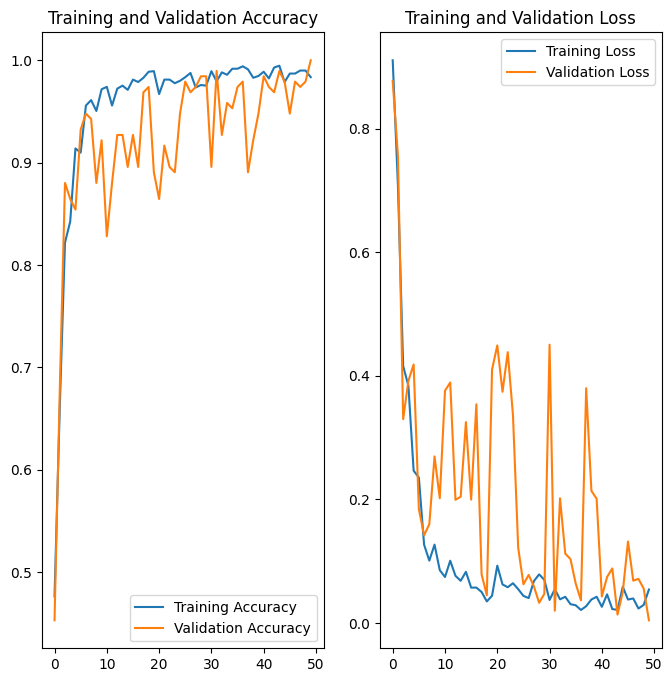

In [128]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [129]:
def prediction(model,image_input):
  img_array=tf.keras.preprocessing.image.img_to_array(image_input.numpy())
  img_array=tf.expand_dims(img_array,0)
  predictions=model.predict(img_array)
  class_name=classes[np.argmax(predictions)]
  confidence=round(100*(np.max(predictions)),2)
  return class_name,confidence

1/1 [==============================] - 0s 22ms/step


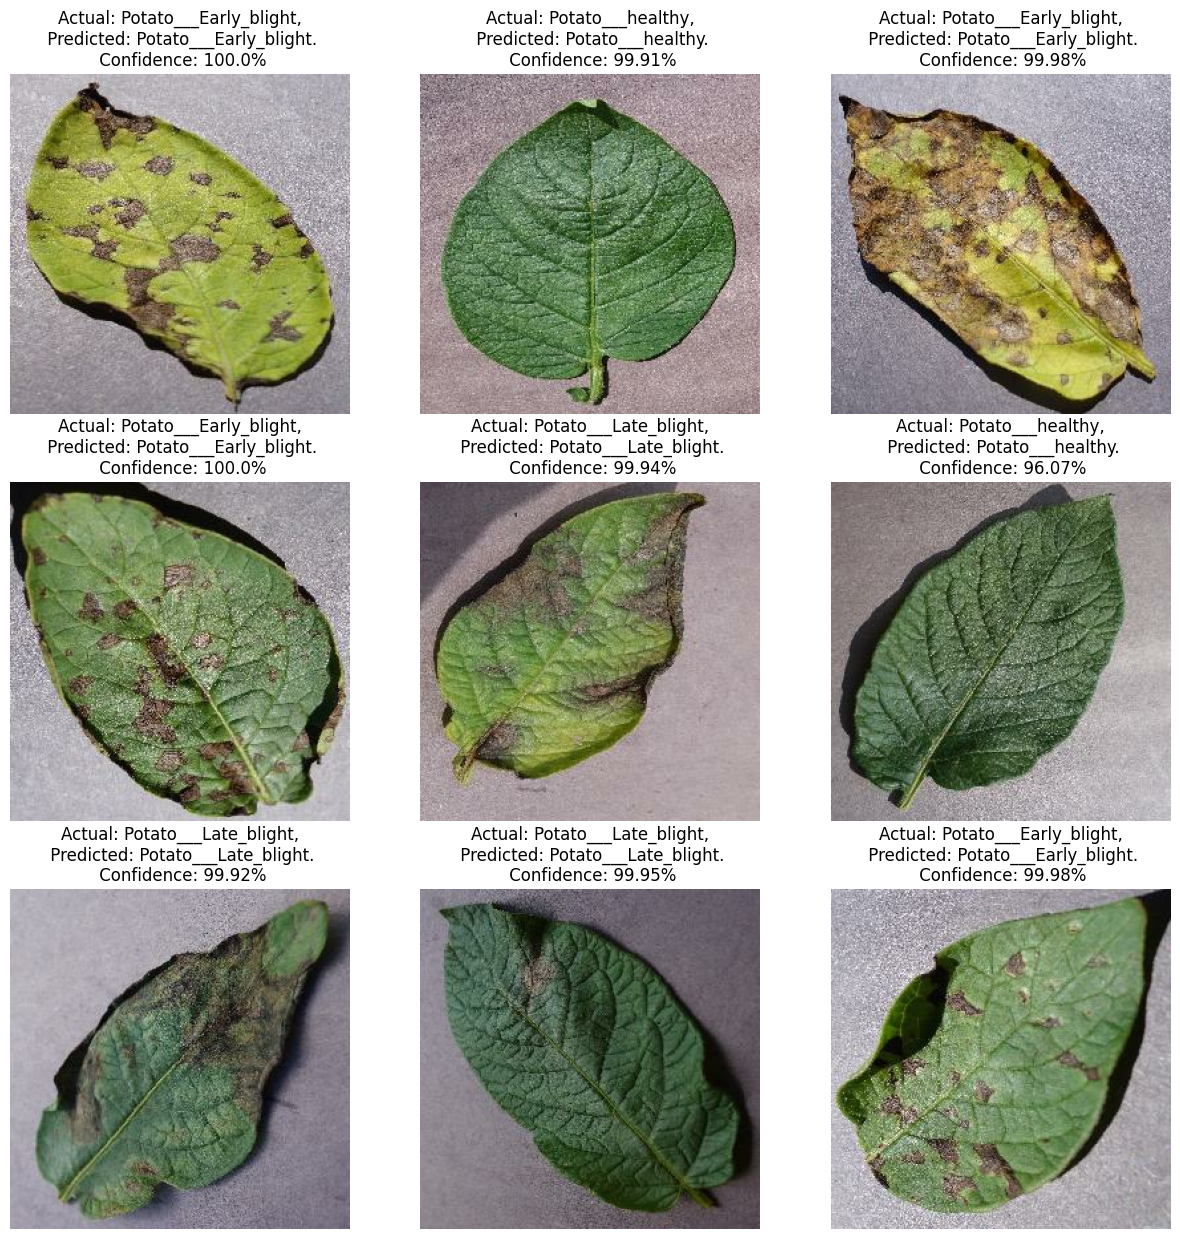

In [130]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = prediction(model, images[i])
        actual_class = classes[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")